In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
from matplotlib.pyplot import figure

In [2]:
#Reading CSV File
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Looking For Missing Values in Dataset
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
#Filling The Missing Values 
df["rating"] = df["rating"].fillna("R")
df["released"] = df["released"].fillna("September 25, 1980 (United States)")
df["score"] = df["score"].fillna("7.5")
df["votes"] = df["votes"].fillna("927000.0")
df["writer"] = df["writer"].fillna("Stephen King")
df["star"] = df["star"].fillna("Brooke Shields")
df["country"] = df["country"].fillna("United States")
df["budget"] = df["budget"].fillna("19000000.0")
df["gross"] = df["gross"].fillna("58853106.0")
df["company"] = df["company"].fillna("Warner Bros.")
df["runtime"] = df["runtime"].fillna("104.0")

In [5]:
for cols in df.columns:
    values = np.mean(df[cols].isnull())
    print("{}-{}%".format(cols,values))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [6]:
#Data types for Columns
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score       object
votes       object
director    object
writer      object
star        object
country     object
budget      object
gross       object
company     object
runtime     object
dtype: object

In [9]:
#Changing Data types of Few Columns
df["votes"] = df["votes"].astype(int)
df["budget"] = df["budget"].astype(int)
df["runtime"] = df["runtime"].astype(int)
df["gross"] = df["gross"].astype(int)

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
#Sorting Values
df.sort_values(by=["gross"],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,19000000,1400,British Broadcasting Corporation (BBC),103
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,19000000,790,Visual Arts Entertainment,104
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,19000000,682,Roxwell Films,93
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134


In [12]:
#Dropping Duplicates 
df.drop_duplicates(inplace=True)

In [13]:
#Exploring The Dataset
df.describe()

,year,votes,budget,gross,runtime
count,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000
mean,2000.405451,8.843671e+04,3.089287e+07,7.801627e+07,107.259911
std,11.153508,1.641325e+05,3.588737e+07,1.636981e+08,18.576549
min,1980.000000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,9.100000e+03,1.400000e+07,4.681151e+06,95.000000
50%,2000.000000,3.300000e+04,1.900000e+07,2.141330e+07,104.000000
75%,2010.000000,9.300000e+04,3.200000e+07,7.262022e+07,116.000000
max,2020.000000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      7668 non-null   object
 1   rating    7668 non-null   object
 2   genre     7668 non-null   object
 3   year      7668 non-null   int64 
 4   released  7668 non-null   object
 5   score     7668 non-null   object
 6   votes     7668 non-null   int64 
 7   director  7668 non-null   object
 8   writer    7668 non-null   object
 9   star      7668 non-null   object
 10  country   7668 non-null   object
 11  budget    7668 non-null   int64 
 12  gross     7668 non-null   int64 
 13  company   7668 non-null   object
 14  runtime   7668 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 898.7+ KB


In [15]:
shape = df.shape
size  = df.size
print("The Shape of the Dataset is: ",shape)
print("The size of the Dataset is: ",size)

The Shape of the Dataset is:  (7668, 15)
The size of the Dataset is:  115020


In [16]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score       object
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

Text(0, 0.5, 'Budget for Films')

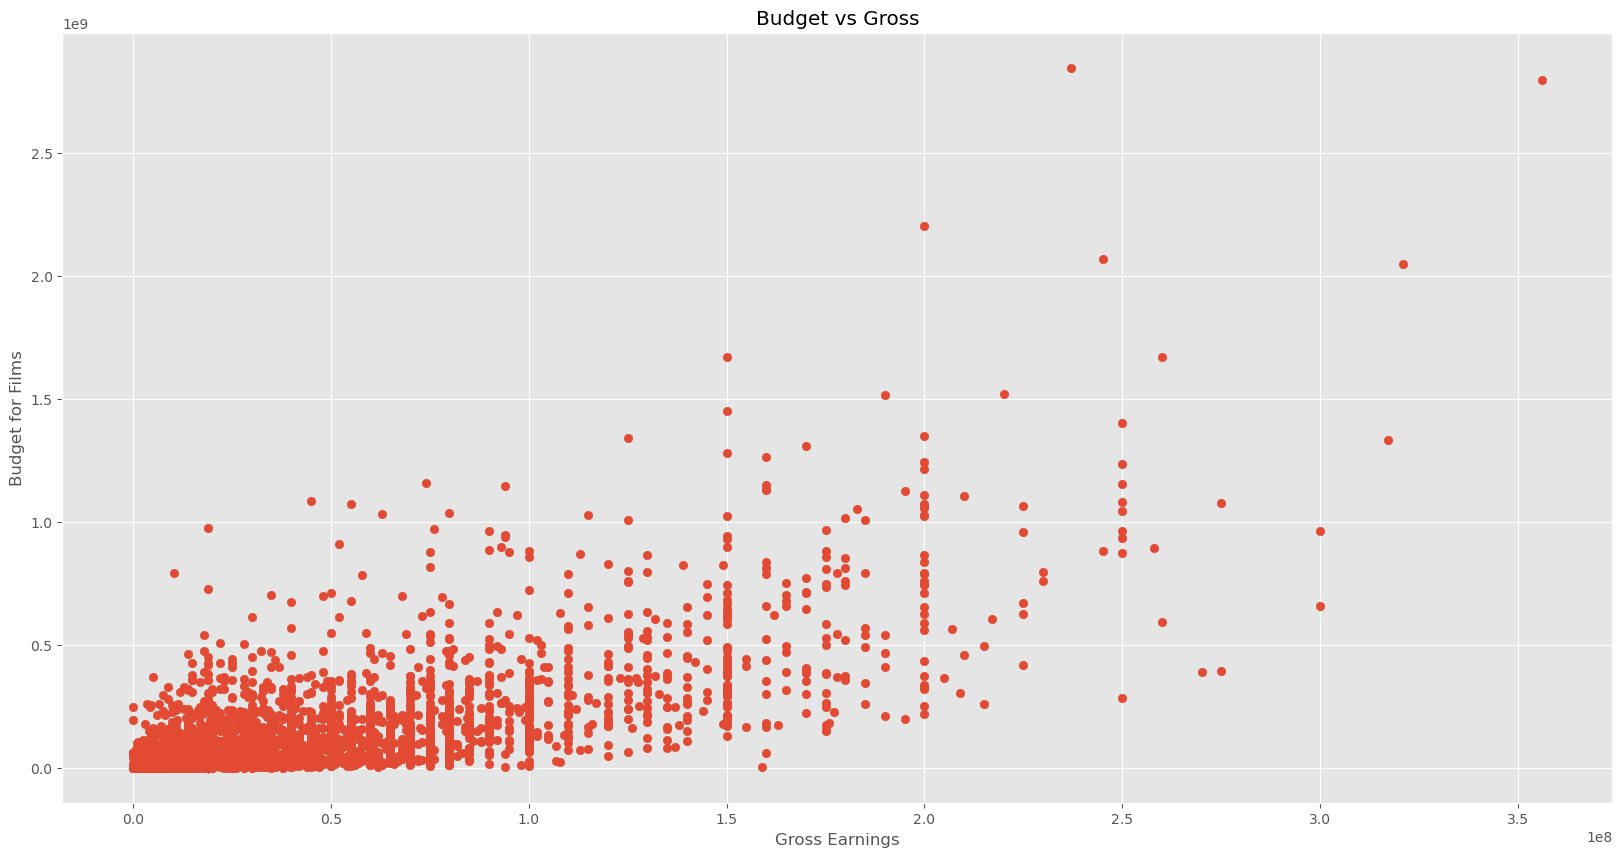

In [17]:
#Scatter Plot with Budget and gross 
plt.figure(figsize=(20,10))
plt.title("Budget vs Gross")
plt.scatter(x=df["budget"],y=df["gross"])
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for Films")

<Axes: xlabel='budget', ylabel='gross'>

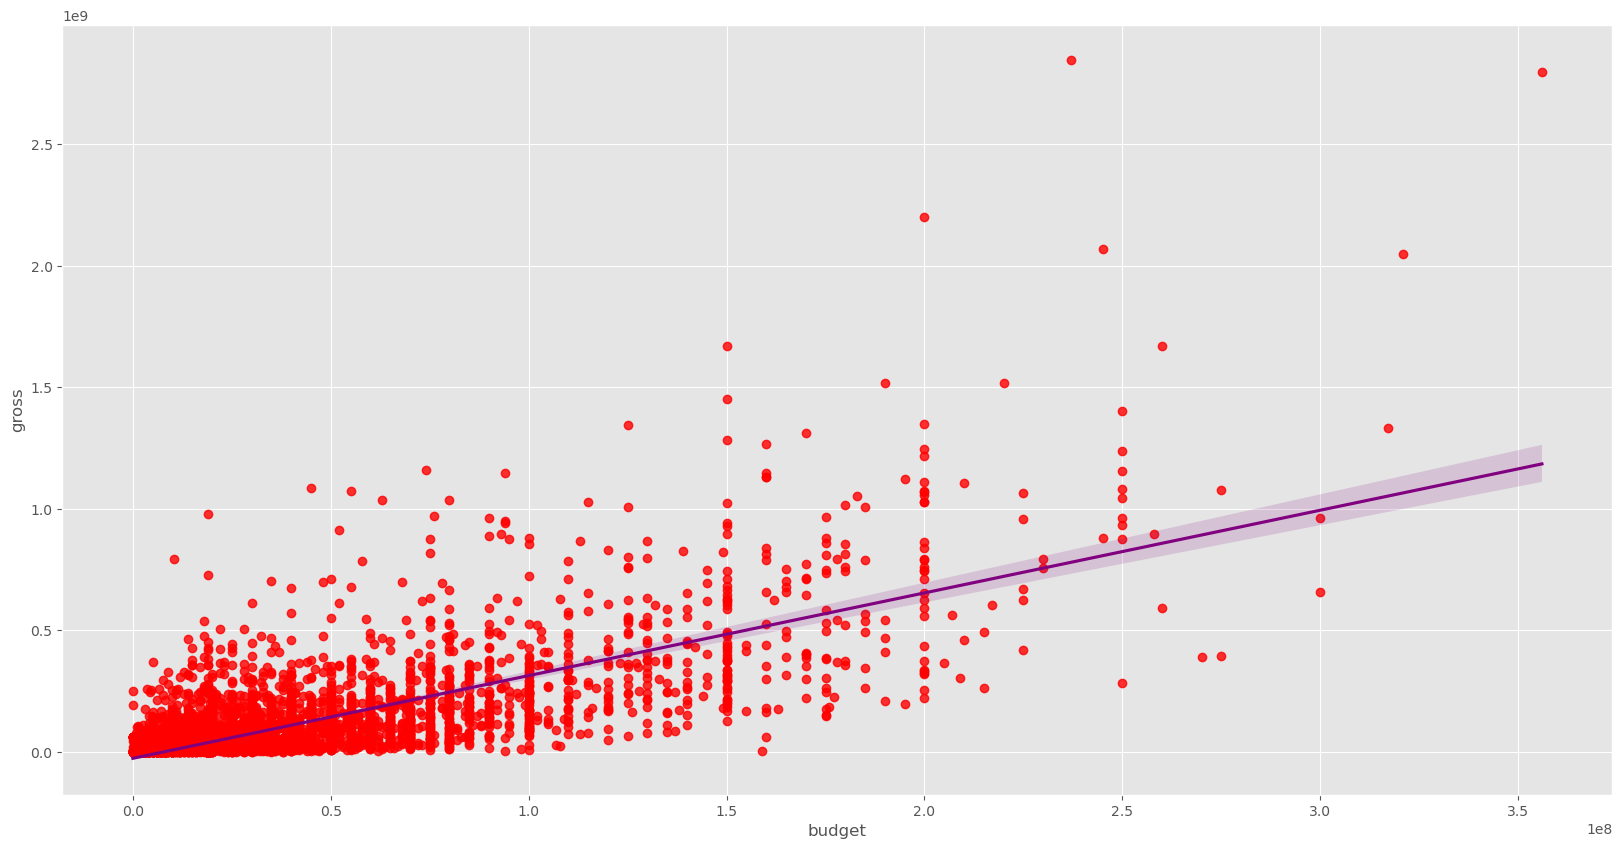

In [22]:
# Plot Budget vs Gross using Seaborn
plt.figure(figsize=(20,10))
sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"red"},line_kws={"color":"purple"})

In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


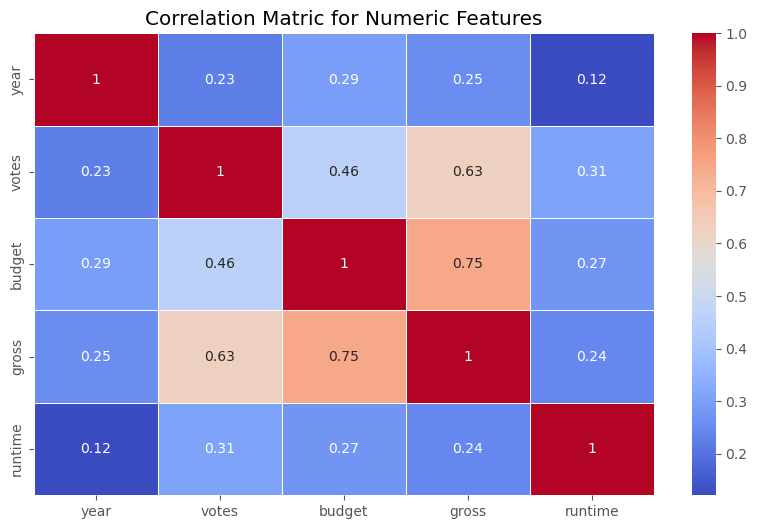

In [27]:
# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matric for Numeric Features")
plt.show()

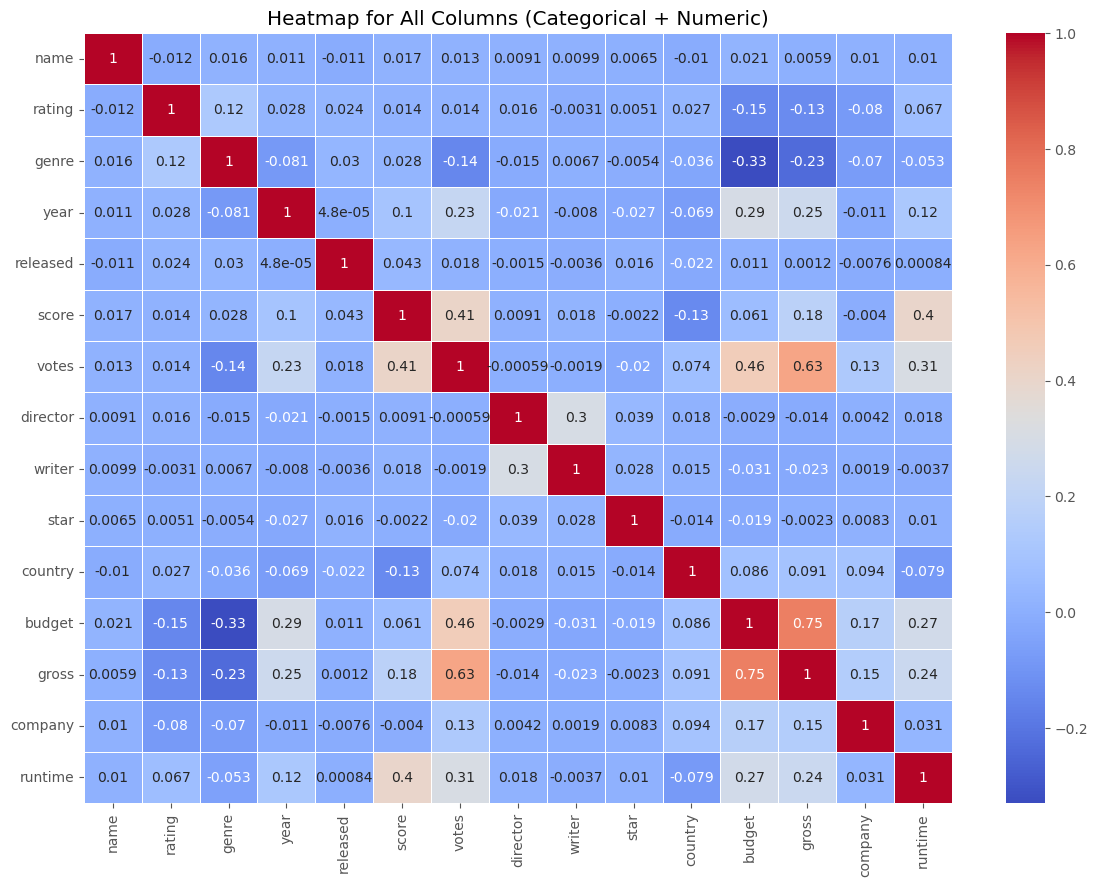

In [30]:
# Convert all categorical columns to numeric codes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

# Create heatmap for all columns
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap for All Columns (Categorical + Numeric)")
plt.show()